In [1]:
pip install display

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for display: filename=display-1.0.0-py3-none-any.whl size=1380 sha256=05efd6a5cebef3a76b94a2f71d98486dfcc3ccb0bdd884e2627fdad0f98fe9fc
  Stored in directory: c:\users\yifan\appdata\local\pip\cache\wheels\b3\45\b2\c40be70bc2856c345453aafc8ad480489e0b05222447531987
Successfully built display
Note: you may need to restart the kernel to use updated packages.


In [1]:
from sklearn import tree
from sklearn import preprocessing
import numpy as np
import numpy as npIPython
import pandas as pd
import graphviz


In [2]:
from IPython.display import display, HTML
form_code = '''
<form id="feature-form">
  <label for="feature1">Feature 1:</label>
  <input type="text" id="feature1" name="feature1" value=""><br>

  <label for="feature2">Feature 2:</label>
  <input type="text" id="feature2" name="feature2" value=""><br>

  <label for="feature3">Feature 3:</label>
  <input type="text" id="feature3" name="feature3" value=""><br>

  <label for="feature4">Feature 4:</label>
  <input type="text" id="feature4" name="feature4" value=""><br>

  <label for="feature5">Feature 5:</label>
  <input type="text" id="feature5" name="feature5" value=""><br>

  <label for="feature6">Feature 6:</label>
  <input type="text" id="feature6" name="feature6" value=""><br>

  <label for="feature7">Feature 7:</label>
  <input type="text" id="feature7" name="feature7" value=""><br>

  <label for="feature8">Feature 8:</label>
  <input type="text" id="feature8" name="feature8" value=""><br>

  <label for="feature9">Feature 9:</label>
  <input type="text" id="feature9" name="feature9" value=""><br>

  <label for="feature10">Feature 10:</label>
  <input type="text" id="feature10" name="feature10" value=""><br>

  <input type="submit" value="Submit">
</form>
'''

javascript_code = '''
<script>
//document.getElementById('feature-form').addEventListener('submit', function(event) {
    event.preventDefault();

    // Get the values from the form inputs
    var feature1 = document.getElementById('feature1').value;
    var feature2 = document.getElementById('feature2').value;
    var feature3 = document.getElementById('feature3').value;
    var feature4 = document.getElementById('feature4').value;
    var feature5 = document.getElementById('feature5').value;
    var feature6 = document.getElementById('feature6').value;
    var feature7 = document.getElementById('feature7').value;
    var feature8 = document.getElementById('feature8').value;
    var feature9 = document.getElementById('feature9').value;
    var feature10 = document.getElementById('feature10').value;

    // Set the values in the new_instance array
    kernel.invokeFunction('update_new_instance', [feature1, feature2, feature3, feature4, feature5, feature6, feature7, feature8, feature9, feature10]);
    // Print the new_instance array
});
</script>
'''

# Combine the HTML form and JavaScript code
html_code = form_code + javascript_code
display(HTML(form_code))

## Create dataset

In [3]:
from sklearn import preprocessing

# Define the dataset
dataset = np.array([
['yes', 'no', 'no', 'yes','some',3,'no','yes','French',(0, 10),'wait' ],
['yes', 'no', 'no', 'yes','full',1,'no','no','Thai',(30, 60),'nowait' ],
['no', 'yes', 'no', 'no','some',1,'no','no','Burger',(0, 10),'wait' ],
['yes', 'no', 'yes', 'yes','full',1,'yes','no','Thai',(10, 30),'wait' ],
['yes', 'no', 'yes', 'no','full',3,'no','yes','French',(60, np.inf),'nowait' ],
['no', 'yes', 'no', 'yes','some',2,'yes','yes','Italian',(0, 10),'wait' ],
['no', 'yes', 'no', 'no','none',1,'yes','no','Burger',(0, 10),'nowait' ],
['no', 'no', 'no', 'yes','some',2,'yes','yes','Thai',(0, 10),'wait' ],
['no', 'yes', 'yes', 'no','full',1,'yes','no','Burger',(60, np.inf),'nowait' ],
['yes', 'yes', 'yes', 'yes','full',3,'no','yes','Italian',(10, 30),'nowait' ],
['no', 'no', 'no', 'no','none',1,'no','no','Thai',(0, 10),'nowait' ],
['yes', 'yes', 'yes','yes','full',1,'no','no','Burger',(30, 60),'wait' ],
])

# Create a dictionary to store the LabelEncoders
le_dict = {}

# For each column in the dataset...
for i in [0, 1, 2, 3, 4, 6, 7, 8]:
    # Create a new LabelEncoder
    le = preprocessing.LabelEncoder()

    # Fit the LabelEncoder to the column data
    le.fit(dataset[:, i])

    # Store the LabelEncoder in the dictionary
    le_dict[i] = le

C:\Users\yifan\AppData\Local\Temp\ipykernel_12148\2244046500.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dataset = np.array([


In [4]:
for i in le_dict:
    print(f"Column {i} has labels {le_dict[i].classes_}")

Column 0 has labels ['no' 'yes']
Column 1 has labels ['no' 'yes']
Column 2 has labels ['no' 'yes']
Column 3 has labels ['no' 'yes']
Column 4 has labels ['full' 'none' 'some']
Column 6 has labels ['no' 'yes']
Column 7 has labels ['no' 'yes']
Column 8 has labels ['Burger' 'French' 'Italian' 'Thai']


In [5]:
X = dataset[:, 0:10]
y = dataset[:, 10]

In [6]:
# Apply label encoding to the rest of the columns
for i in [0, 1, 2, 3, 4, 6, 7, 8]:
    X[:, i] = le_dict[i].transform(X[:, i])

In [7]:
## handle the range value. Define a mapping from range to bin label
range_to_bin = {
    (0, 10): 0,
    (10, 30): 1,
    (30, 60): 2,
    (60, np.inf): 3
}

# Apply the mapping to the 9th column
X[:, 9] = np.vectorize(range_to_bin.get)(X[:, 9])
X

array([[1, 0, 0, 1, 2, 3, 0, 1, 1, 0],
       [1, 0, 0, 1, 0, 1, 0, 0, 3, 2],
       [0, 1, 0, 0, 2, 1, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 1, 1, 0, 3, 1],
       [1, 0, 1, 0, 0, 3, 0, 1, 1, 3],
       [0, 1, 0, 1, 2, 2, 1, 1, 2, 0],
       [0, 1, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 2, 2, 1, 1, 3, 0],
       [0, 1, 1, 0, 0, 1, 1, 0, 0, 3],
       [1, 1, 1, 1, 0, 3, 0, 1, 2, 1],
       [0, 0, 0, 0, 1, 1, 0, 0, 3, 0],
       [1, 1, 1, 1, 0, 1, 0, 0, 0, 2]], dtype=object)

In [8]:
# Define a new LabelEncoder for the target
le_y = preprocessing.LabelEncoder()

# Fit the LabelEncoder to the target
le_y.fit(y)

# Transform the target
y = le_y.transform(y)

In [9]:
# Create a decision tree classifier
dtc = tree.DecisionTreeClassifier(criterion="entropy")

# Fit the classifier to your data
dtc.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

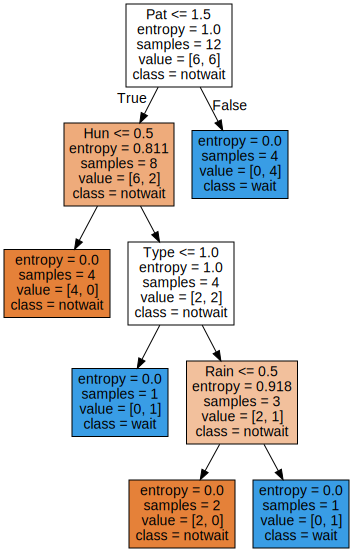

In [11]:
# Export the tree in DOT format
dot_data = tree.export_graphviz(dtc, out_file=None, 
                                feature_names=['Alt', 'Bar', 'Fri','Hun','Pat','Price','Rain','Res','Type','Est'],  
                                class_names=['notwait', 'wait'],  
                                filled=True)

# Create a Graphviz object
graph = graphviz.Source(dot_data)

# Display the graph
graph

In [12]:
# Define a new instance
def predict_new_instance(feature1, feature2, feature3, feature4, feature5, feature6, feature7, feature8, feature9, feature10):

    new_instance = np.array([feature1, feature2, feature3, feature4, feature5, feature6, feature7, feature8, feature9, feature10])

# Preprocess the new instance in the same way as the training data
    for i in [0, 1, 2, 3, 4, 6, 7, 8]:
        new_instance[i] = le_dict[i].transform([new_instance[i]])[0]

# Handle the range value
    new_instance[9] = range_to_bin[new_instance[9]]

# Now your new instance is preprocessed and ready for prediction

# Predict the target class for the new instance
    predicted_class = dtc.predict([new_instance])

# Decode the predicted class back into the original label
    predicted_label = le_y.inverse_transform(predicted_class)

# Print the predicted label
    print(predicted_label)


In [13]:
# # Predict the target class for the new instance
#     predicted_class = dtc.predict([new_instance])

# # Decode the predicted class back into the original label
#     predicted_label = le_y.inverse_transform(predicted_class)

# # Print the predicted label
#     print(predicted_label)


In [14]:
## visualize the Dataset
# df2 = pd.DataFrame(dataset,
#                    columns=['Alt', 'Bar', 'Fri','Hun','Pat','Price','Rain','Res','Type','Est','WillWait'])
# blankIndex=[''] * len(df2)
# df2.index=blankIndex
# df2